In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25


In [7]:
data1 = 'data/Navrongo-mean.txt'
data2 = 'data/Navrongo-max.txt'
data3 = 'data/Navrongo-min.txt'

df1 = pd.read_csv(data1, names=['year', 'month', 'day', 'temperature'], sep='\s+')
df2 = pd.read_csv(data2, names=['year', 'month', 'day', 'temperature'], sep='\s+')
df3 = pd.read_csv(data3, names=['year', 'month', 'day', 'temperature'], sep='\s+')

<Figure size 2500x1000 with 0 Axes>

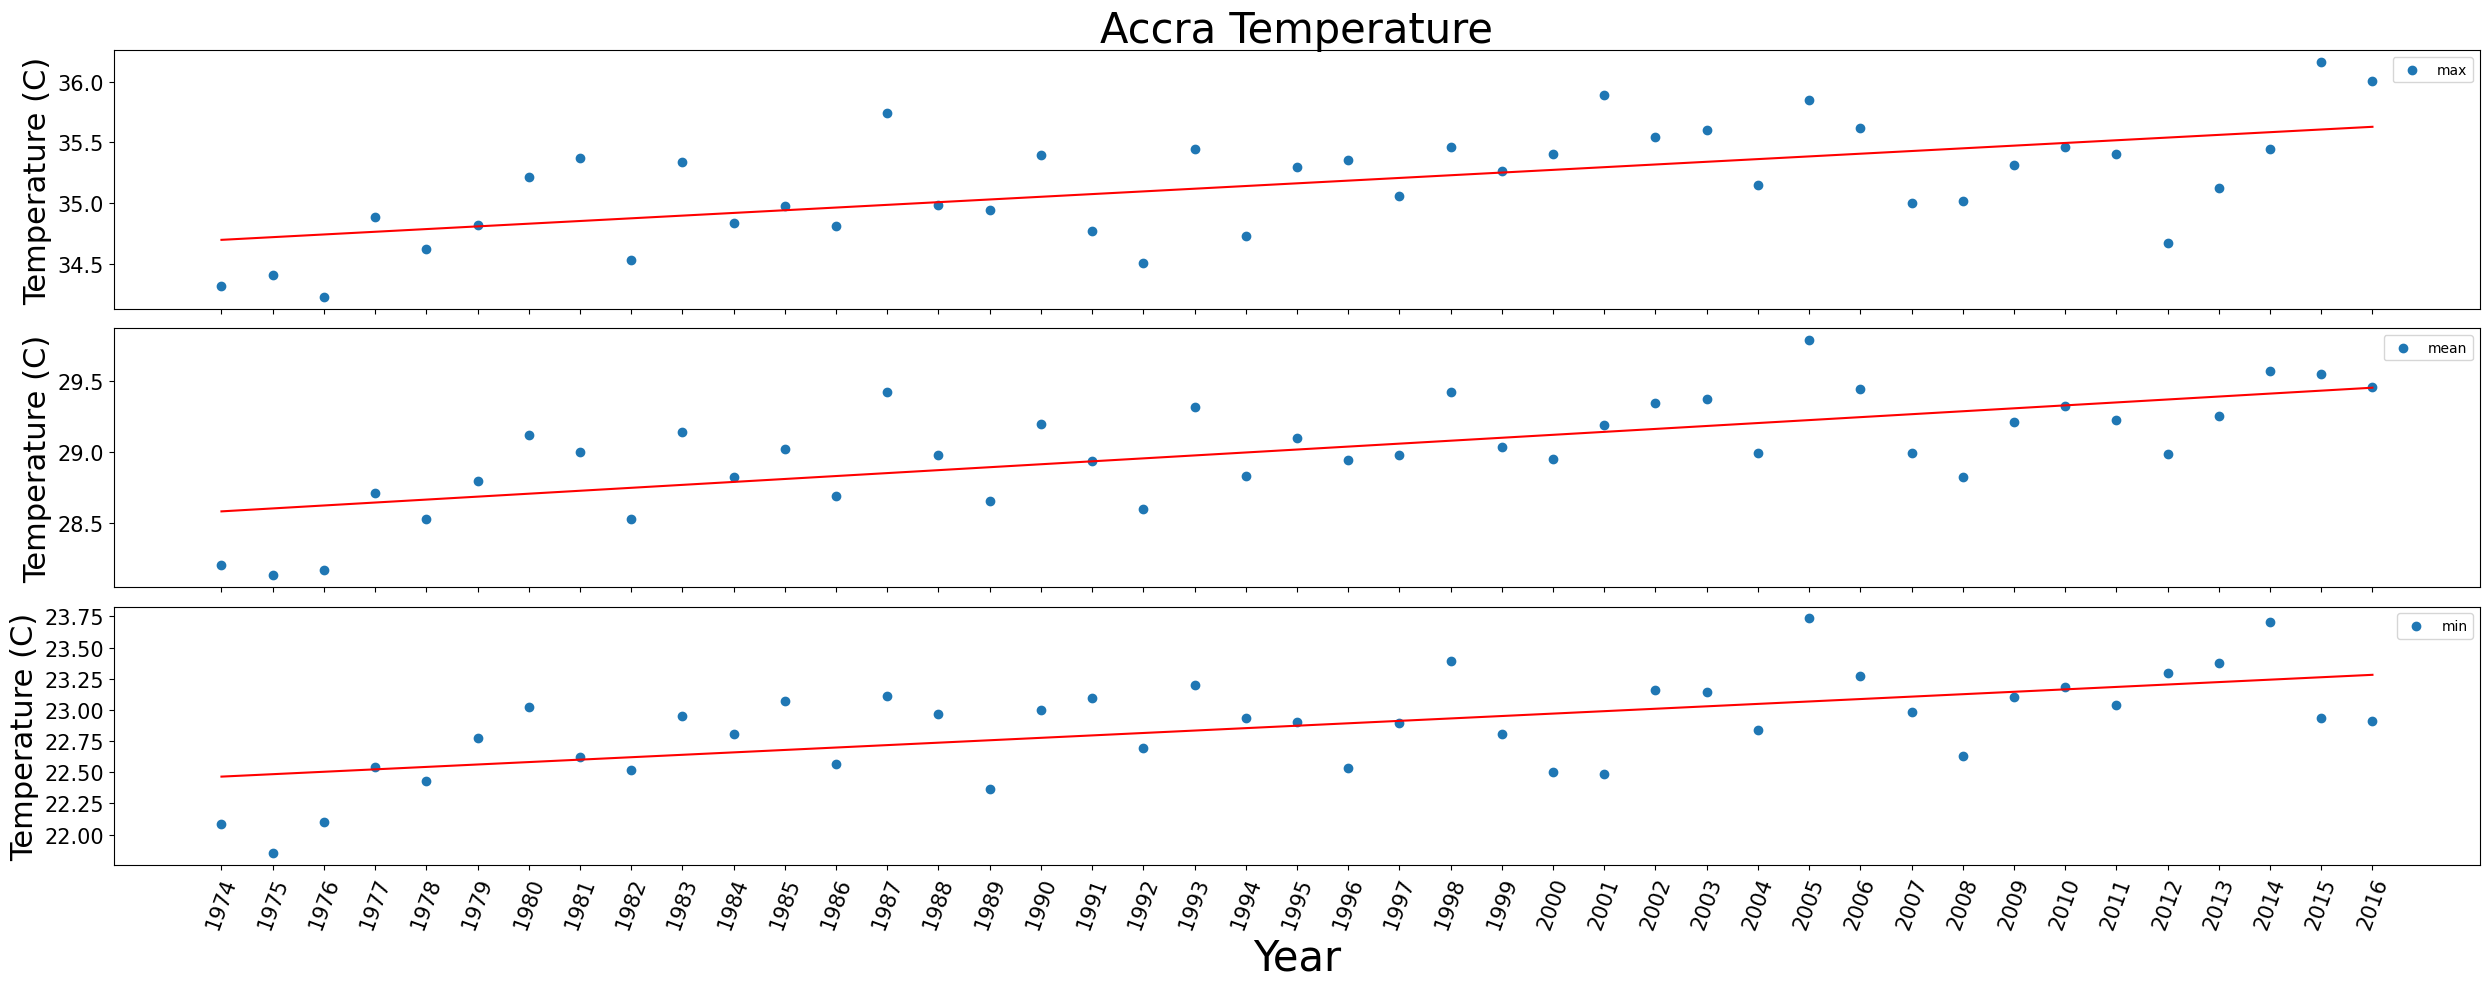

In [8]:
#calculate the yearly mean for all the 3 data sets
df1_yearly = df1.groupby('year').mean()
df2_yearly = df2.groupby('year').mean()
df3_yearly = df3.groupby('year').mean()

#plot vertically stacked scatter plots with line of best fit for each yearly mean

plt.figure(figsize=(25, 10))
#plot scatter and line of best fit for mean

fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
plt.subplots_adjust(hspace=.0)


ax[0].scatter(df2_yearly.index, df2_yearly.temperature, label='max')
ax[0].plot(np.unique(df2_yearly.index), np.poly1d(np.polyfit(df2_yearly.index,df2_yearly.temperature, 1))(np.unique(df2_yearly.index)), color='red')
ax[0].legend()
ax[0].set_ylabel('Temperature (C)', fontsize=22)
ax[0].tick_params(axis='y', labelsize=15)
#add plot title
ax[0].set_title('Accra Temperature', fontsize=30)


ax[1].scatter(df1_yearly.index, df1_yearly.temperature, label='mean')
ax[1].plot(np.unique(df1_yearly.index), np.poly1d(np.polyfit(df1_yearly.index, df1_yearly.temperature, 1))(np.unique(df1_yearly.index)), color='red')
ax[1].legend()
ax[1].set_ylabel('Temperature (C)', fontsize=22)
#set yticks size
ax[1].tick_params(axis='y', labelsize=15)


ax[2].scatter(df3_yearly.index, df3_yearly.temperature, label='min')
ax[2].plot(np.unique(df3_yearly.index), np.poly1d(np.polyfit(df3_yearly.index, df3_yearly.temperature, 1))(np.unique(df3_yearly.index)), color='red')
ax[2].legend()
#show all xticks
plt.xticks(df1_yearly.index, rotation=70, fontsize=15)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Temperature (C)', fontsize=22)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.savefig('Accra-temperature.png')
plt.show()


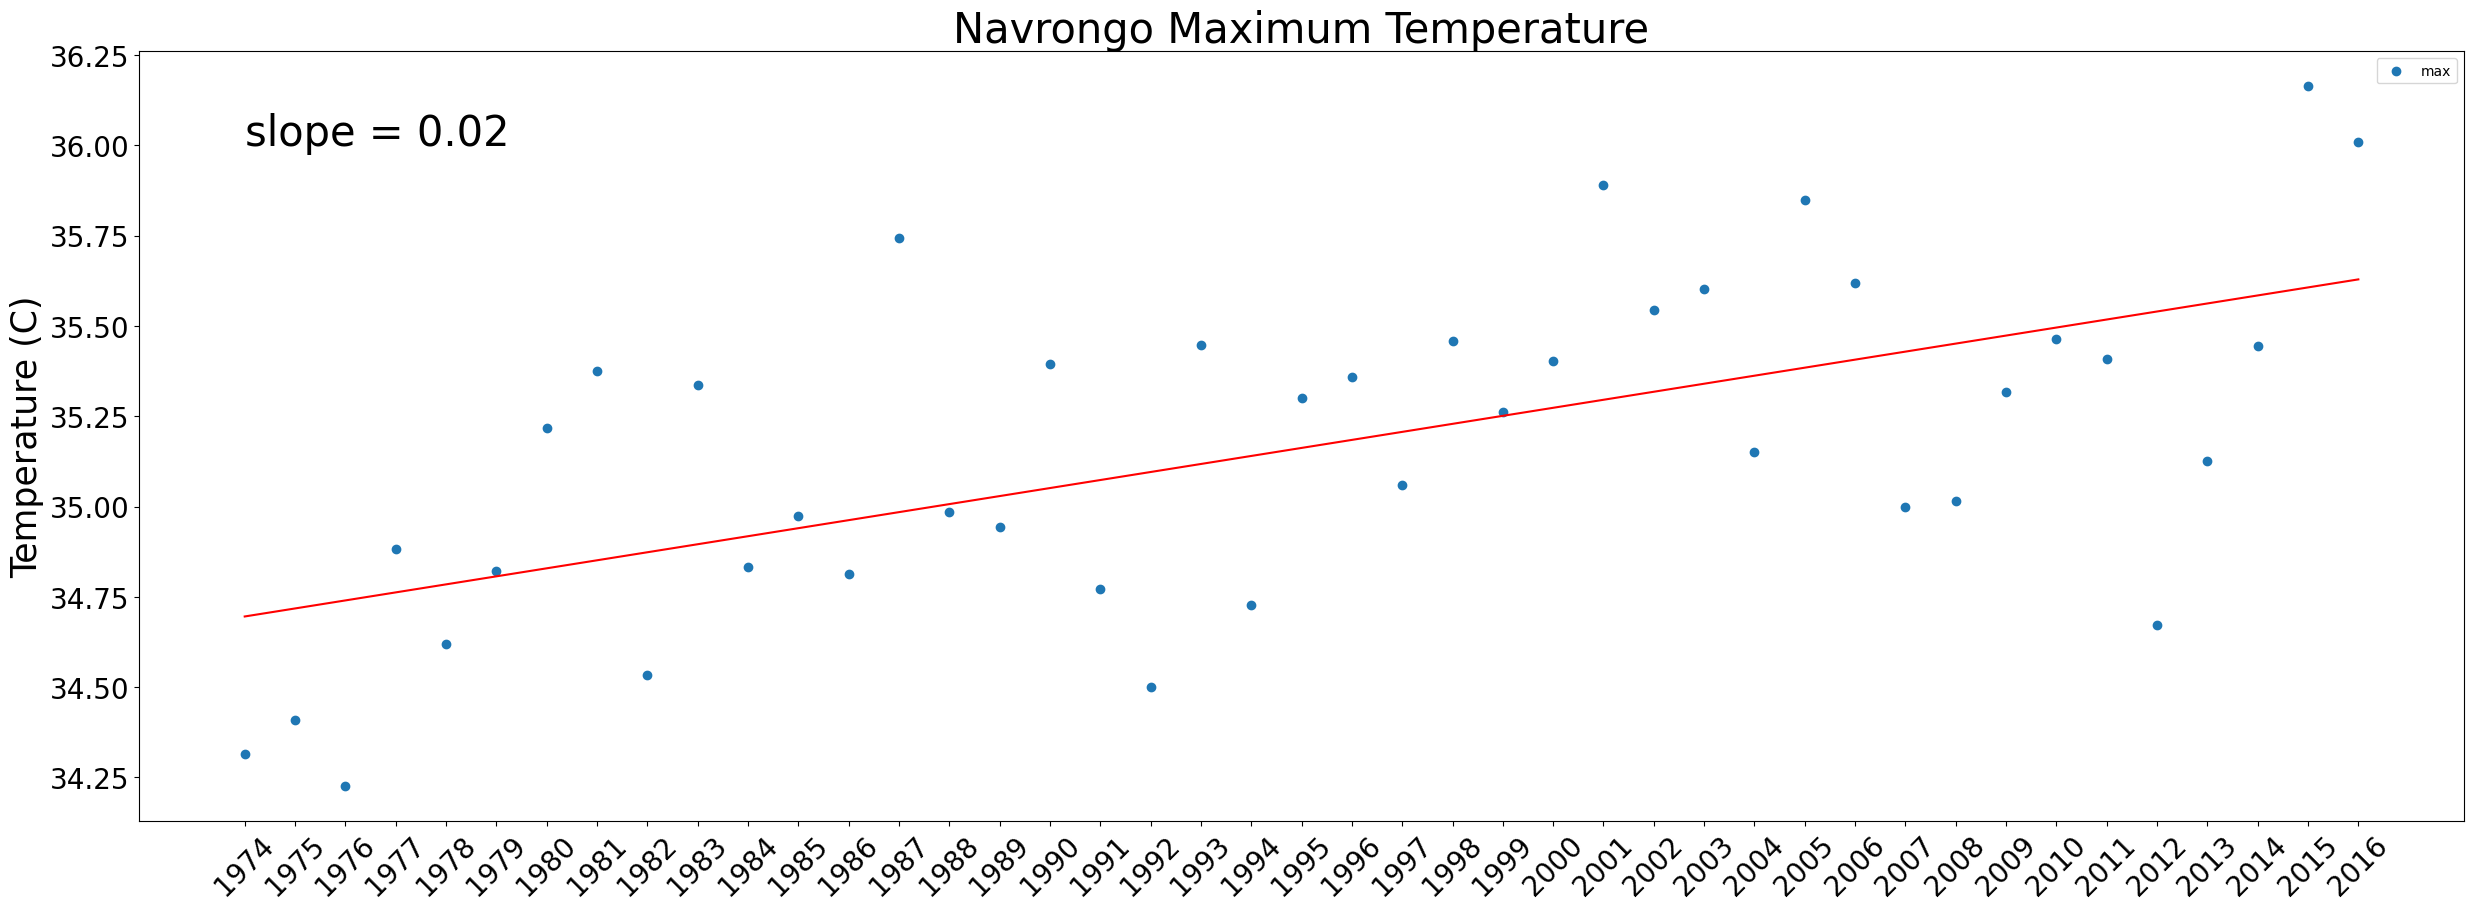

In [11]:
plt.rcParams["figure.figsize"] = (30, 10)
slope = np.polyfit(df2_yearly.index, df2_yearly.temperature, 1)[0]
slope = round(slope, 2)
           
plt.scatter(df2_yearly.index, df2_yearly.temperature, label='max')
plt.plot(np.unique(df2_yearly.index), np.poly1d(np.polyfit(df2_yearly.index,
           df2_yearly.temperature, 1))(np.unique(df2_yearly.index)), color='red')
plt.legend()
plt.ylabel('Temperature (C)', fontsize=25)
plt.yticks(fontsize=20)
plt.text(1974, 36.0, s=f'slope = {slope}', fontsize=30)

plt.xticks(df2_yearly.index, rotation=45,  fontsize=20)
#add plot title
plt.title('Navrongo Maximum Temperature', fontsize=30)
plt.savefig('Navrongo-max-temperature.png')
plt.show()


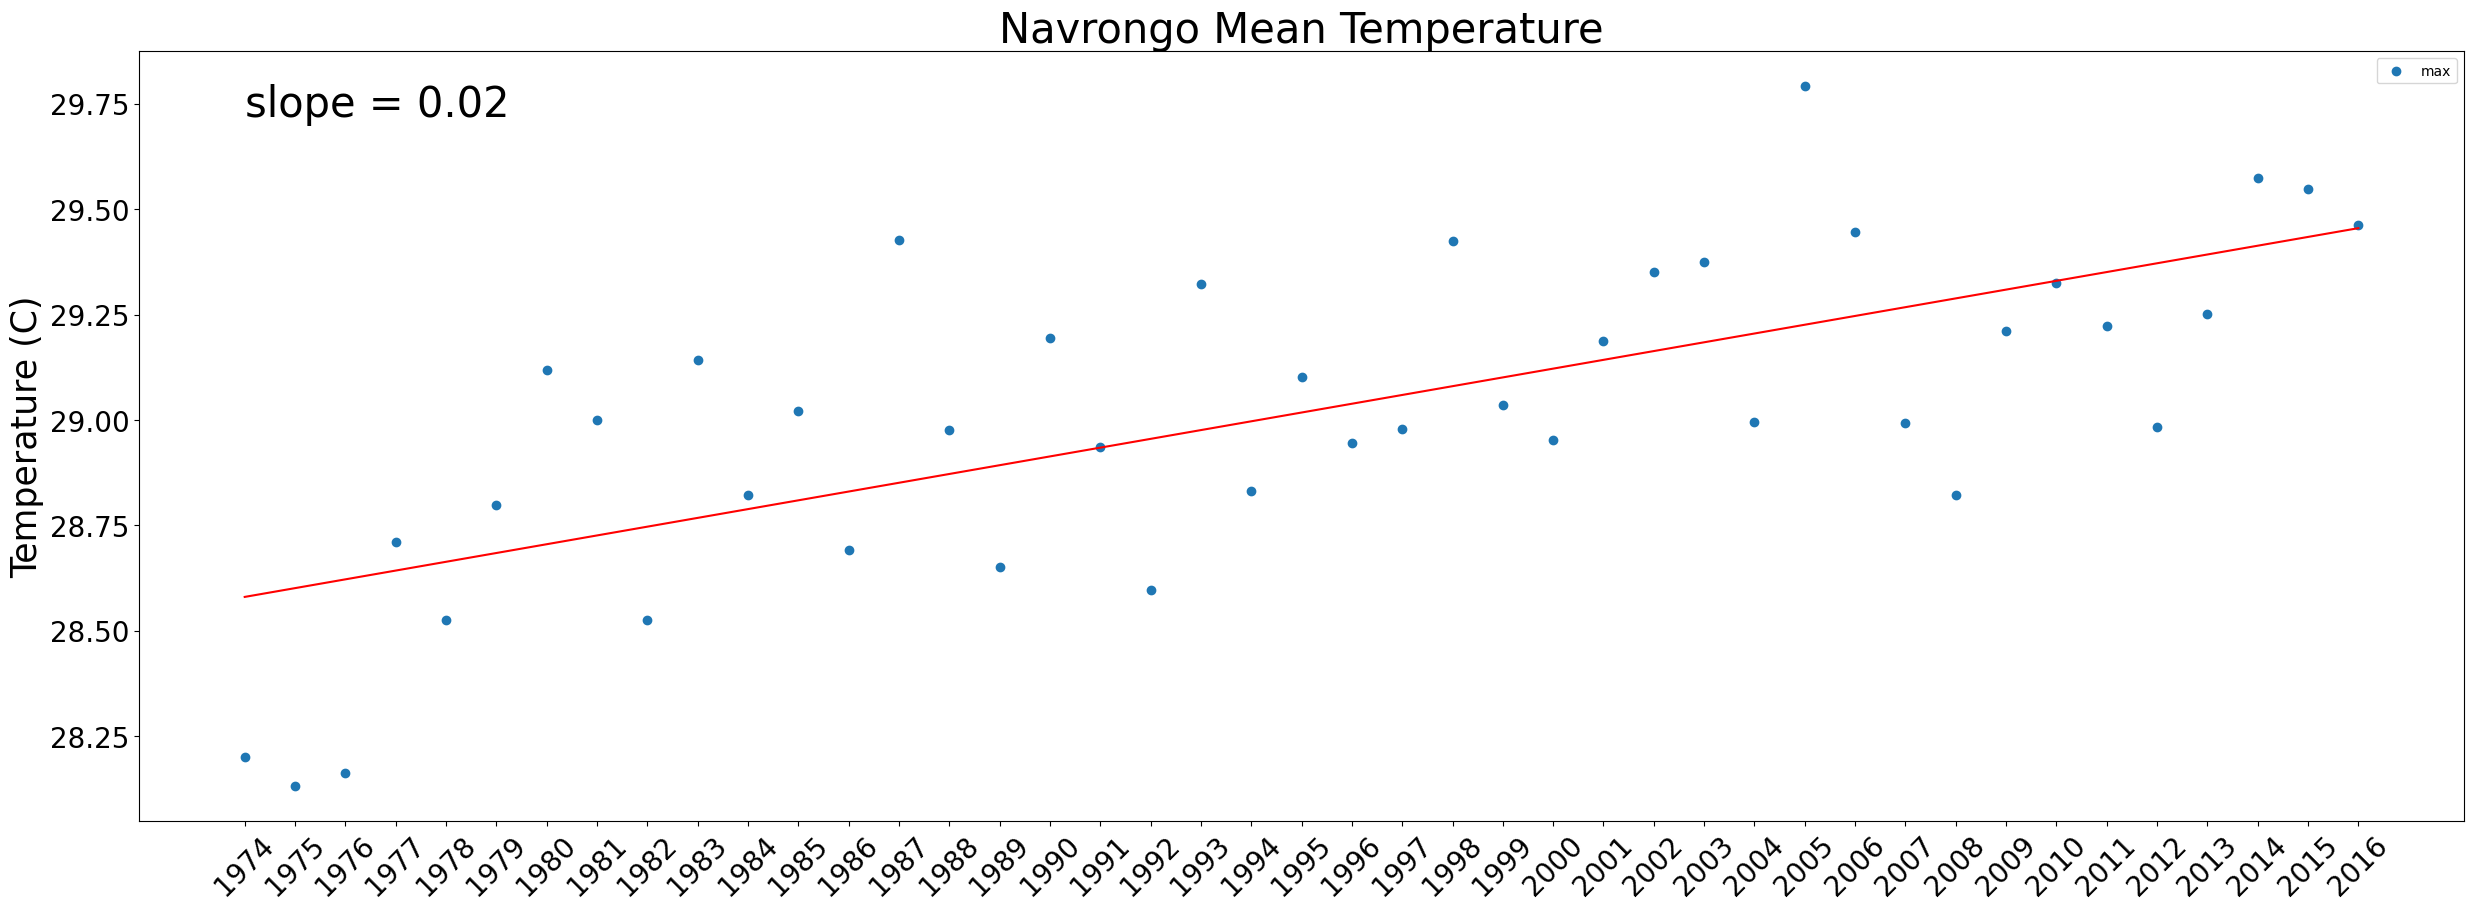

In [13]:
plt.rcParams["figure.figsize"] = (30, 10)
slope = np.polyfit(df1_yearly.index, df1_yearly.temperature, 1)[0]
slope = round(slope, 2)

plt.scatter(df1_yearly.index, df1_yearly.temperature, label='max')
plt.plot(np.unique(df1_yearly.index), np.poly1d(np.polyfit(df1_yearly.index,
                                                           df1_yearly.temperature, 1))(np.unique(df1_yearly.index)), color='red')
plt.legend()
plt.ylabel('Temperature (C)', fontsize=25)
plt.yticks(fontsize=20)
plt.text(1974, 29.72, s=f'slope = {slope}', fontsize=30)

plt.xticks(df1_yearly.index, rotation=45,  fontsize=20)
#add plot title
plt.title('Navrongo Mean Temperature', fontsize=30)
plt.savefig('Navrongo-mean-temperature.png')
plt.show()


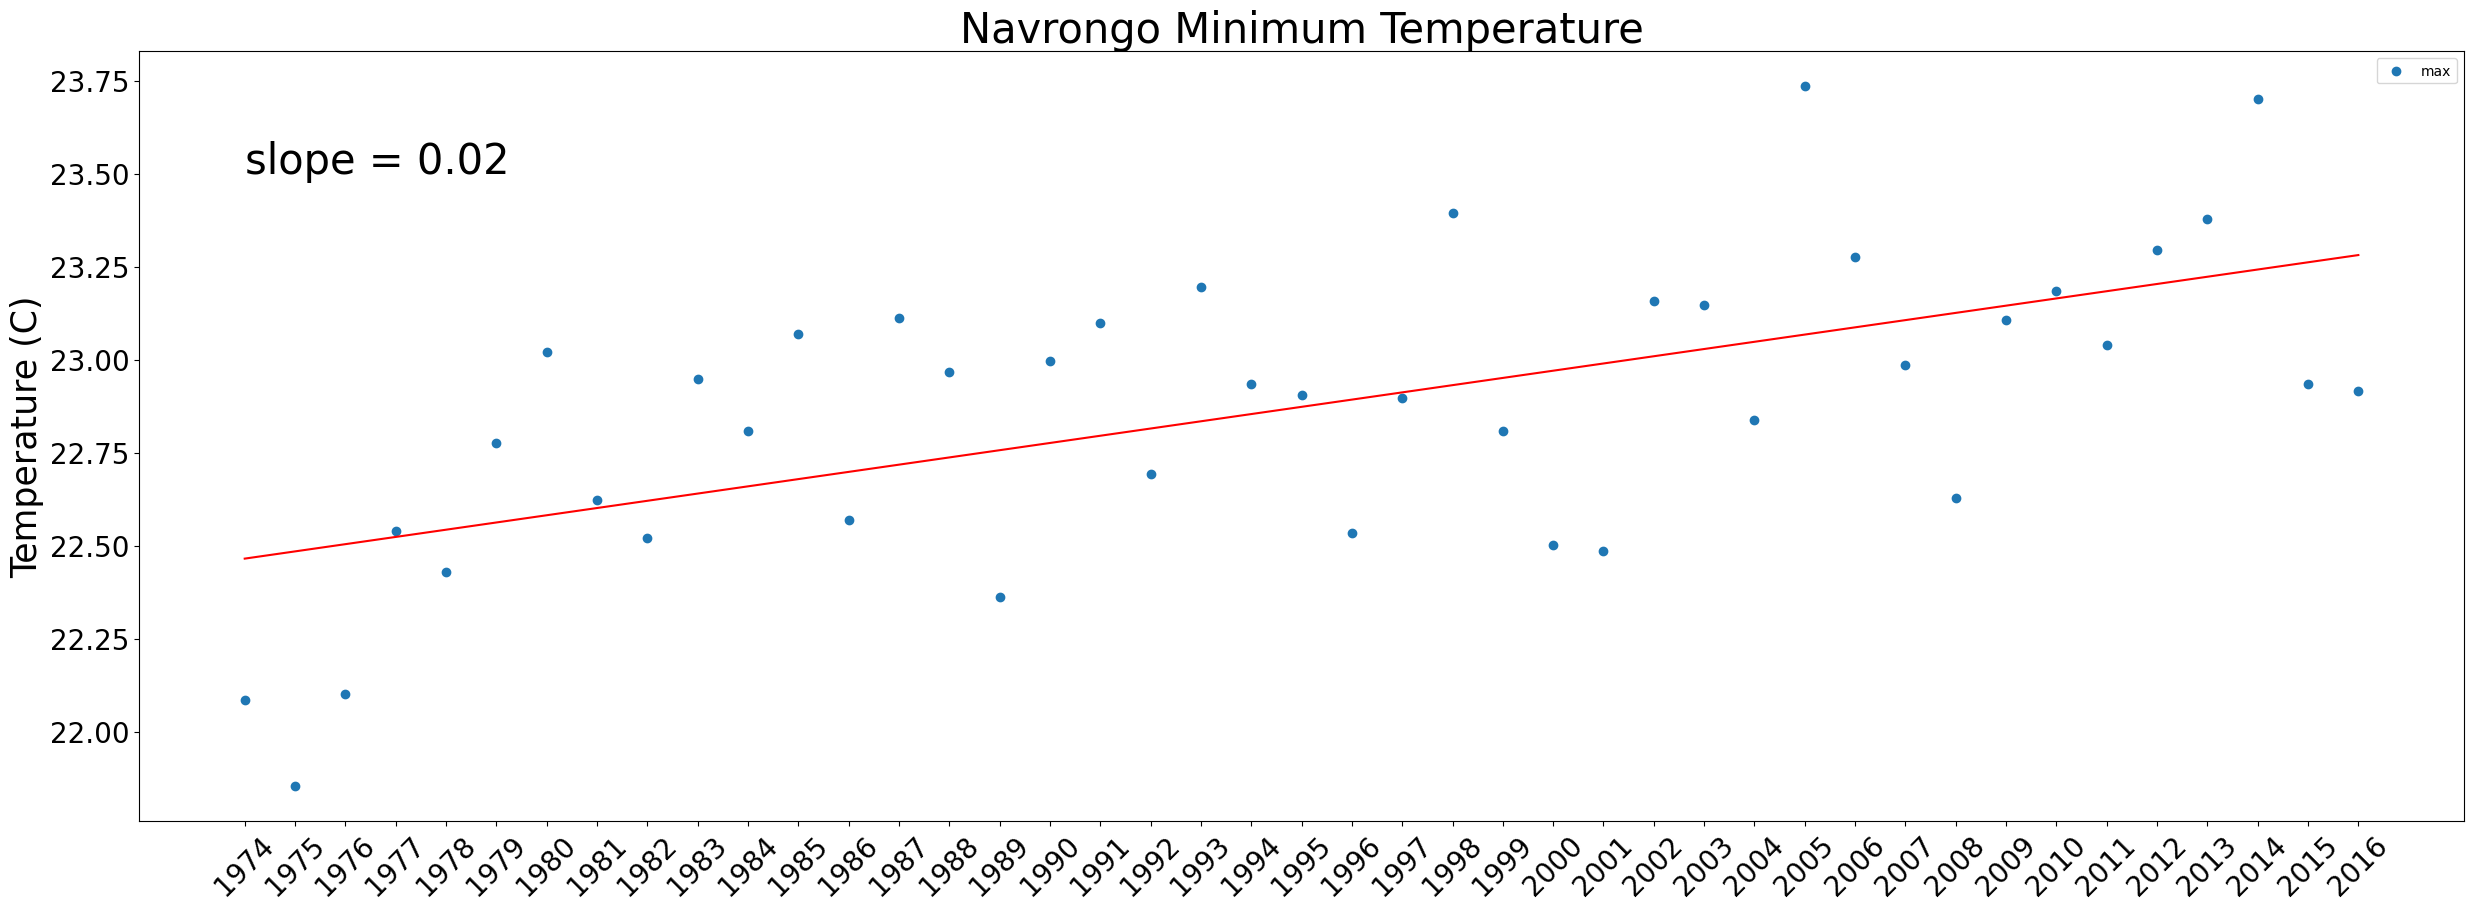

In [15]:
plt.rcParams["figure.figsize"] = (30, 10)
slope = np.polyfit(df3_yearly.index, df3_yearly.temperature, 1)[0]
slope = round(slope, 2)

plt.scatter(df3_yearly.index, df3_yearly.temperature, label='max')
plt.plot(np.unique(df3_yearly.index), np.poly1d(np.polyfit(df3_yearly.index,
                                                           df3_yearly.temperature, 1))(np.unique(df3_yearly.index)), color='red')
plt.legend()
plt.ylabel('Temperature (C)', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(df3_yearly.index, rotation=45,  fontsize=20)
#write slope of line of best fit at top left corner of plot
plt.text(1974, 23.5, s=f'slope = {slope}', fontsize=30)
#add plot title
plt.title('Navrongo Minimum Temperature', fontsize=30)
plt.savefig('Navrongo-min-temperature.png')
plt.show()



In [16]:
#calculate temperature anomaly index for each year
df1_temp_anomaly = (df1_yearly['temperature'] - df1_yearly['temperature'].mean()) / df1_yearly['temperature'].std()
df1_temp_anomaly = df1_temp_anomaly.to_list()

df2_temp_anomaly = (df2_yearly['temperature'] - df2_yearly['temperature'].mean()) / df2_yearly['temperature'].std()
df2_temp_anomaly = df2_temp_anomaly.to_list()

df3_temp_anomaly = (df3_yearly['temperature'] - df3_yearly['temperature'].mean()) / df3_yearly['temperature'].std()
df3_temp_anomaly = df3_temp_anomaly.to_list()

#create a new dataframe with the temperature anomaly index
temp_anomaly = pd.DataFrame({'year': df1_yearly.index, 'mean': df1_temp_anomaly, 'max': df2_temp_anomaly, 'min': df3_temp_anomaly})
temp_anomaly

,year,mean,max,min
0,1974,-2.177513,-1.855806,-1.991071
1,1975,-2.361386,-1.649369,-2.578114
2,1976,-2.276476,-2.052194,-1.952308
3,1977,-0.816703,-0.609980,-0.846061
4,1978,-1.313599,-1.187885,-1.122276
5,1979,-0.585402,-0.749205,-0.246558
6,1980,0.271799,0.122045,0.374949
7,1981,-0.049470,0.466015,-0.631458
8,1982,-1.307762,-1.377519,-0.892443
9,1983,0.333600,0.383200,0.190955


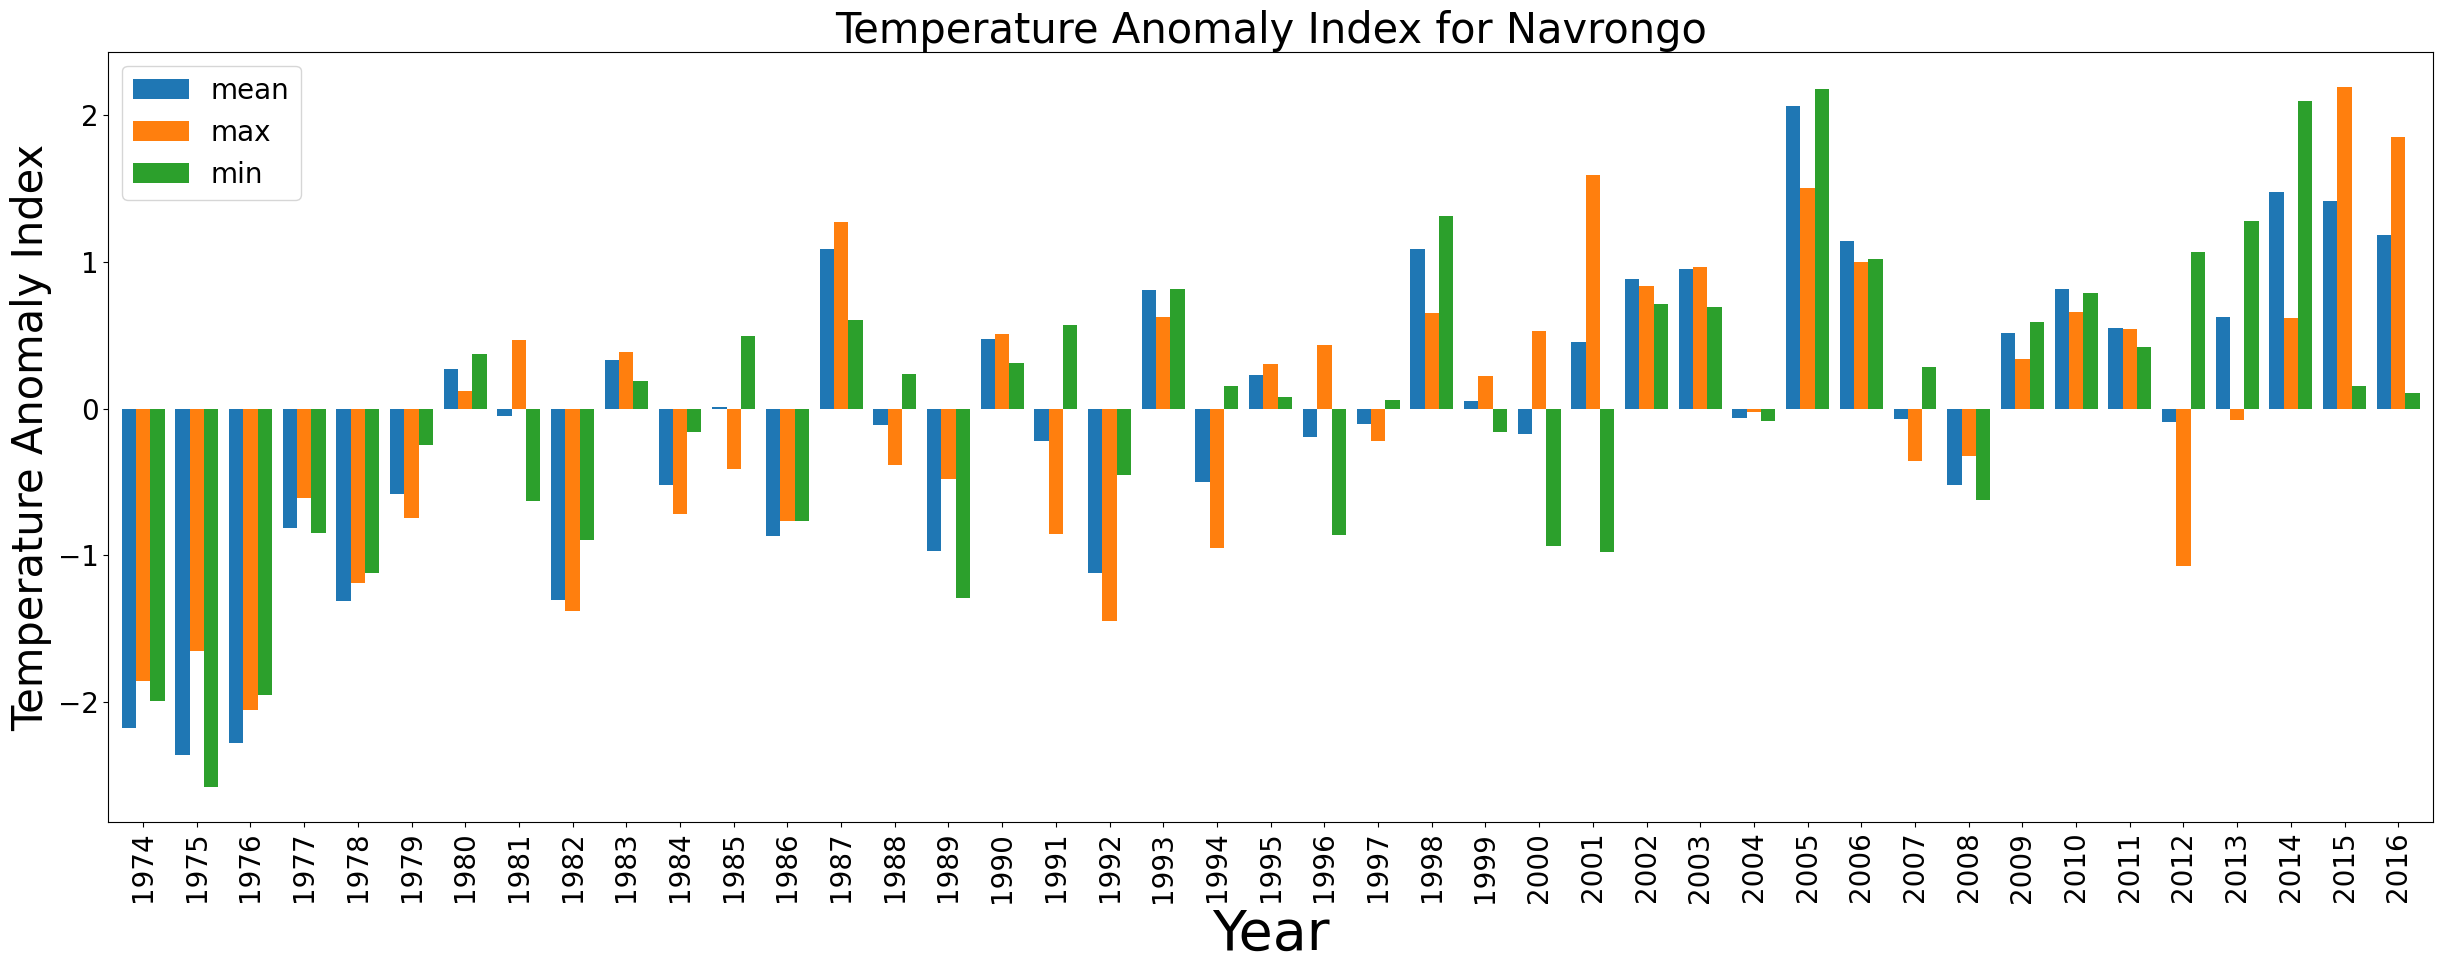

In [17]:
#plot the temperature anomaly index as a bar chart


plt.rcParams["figure.figsize"] = (30, 10)
fig, ax = plt.subplots()
(
    temp_anomaly
    .set_index('year')
    .plot.bar(ax=ax, width=0.8)
)

plt.xlabel('Year', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Temperature Anomaly Index', fontsize=30)
plt.title('Temperature Anomaly Index for Navrongo', fontsize=30)
ax.legend(fontsize=20, loc='upper left')
plt.savefig('Navrongo-temperature-anomaly.png')
plt.show()

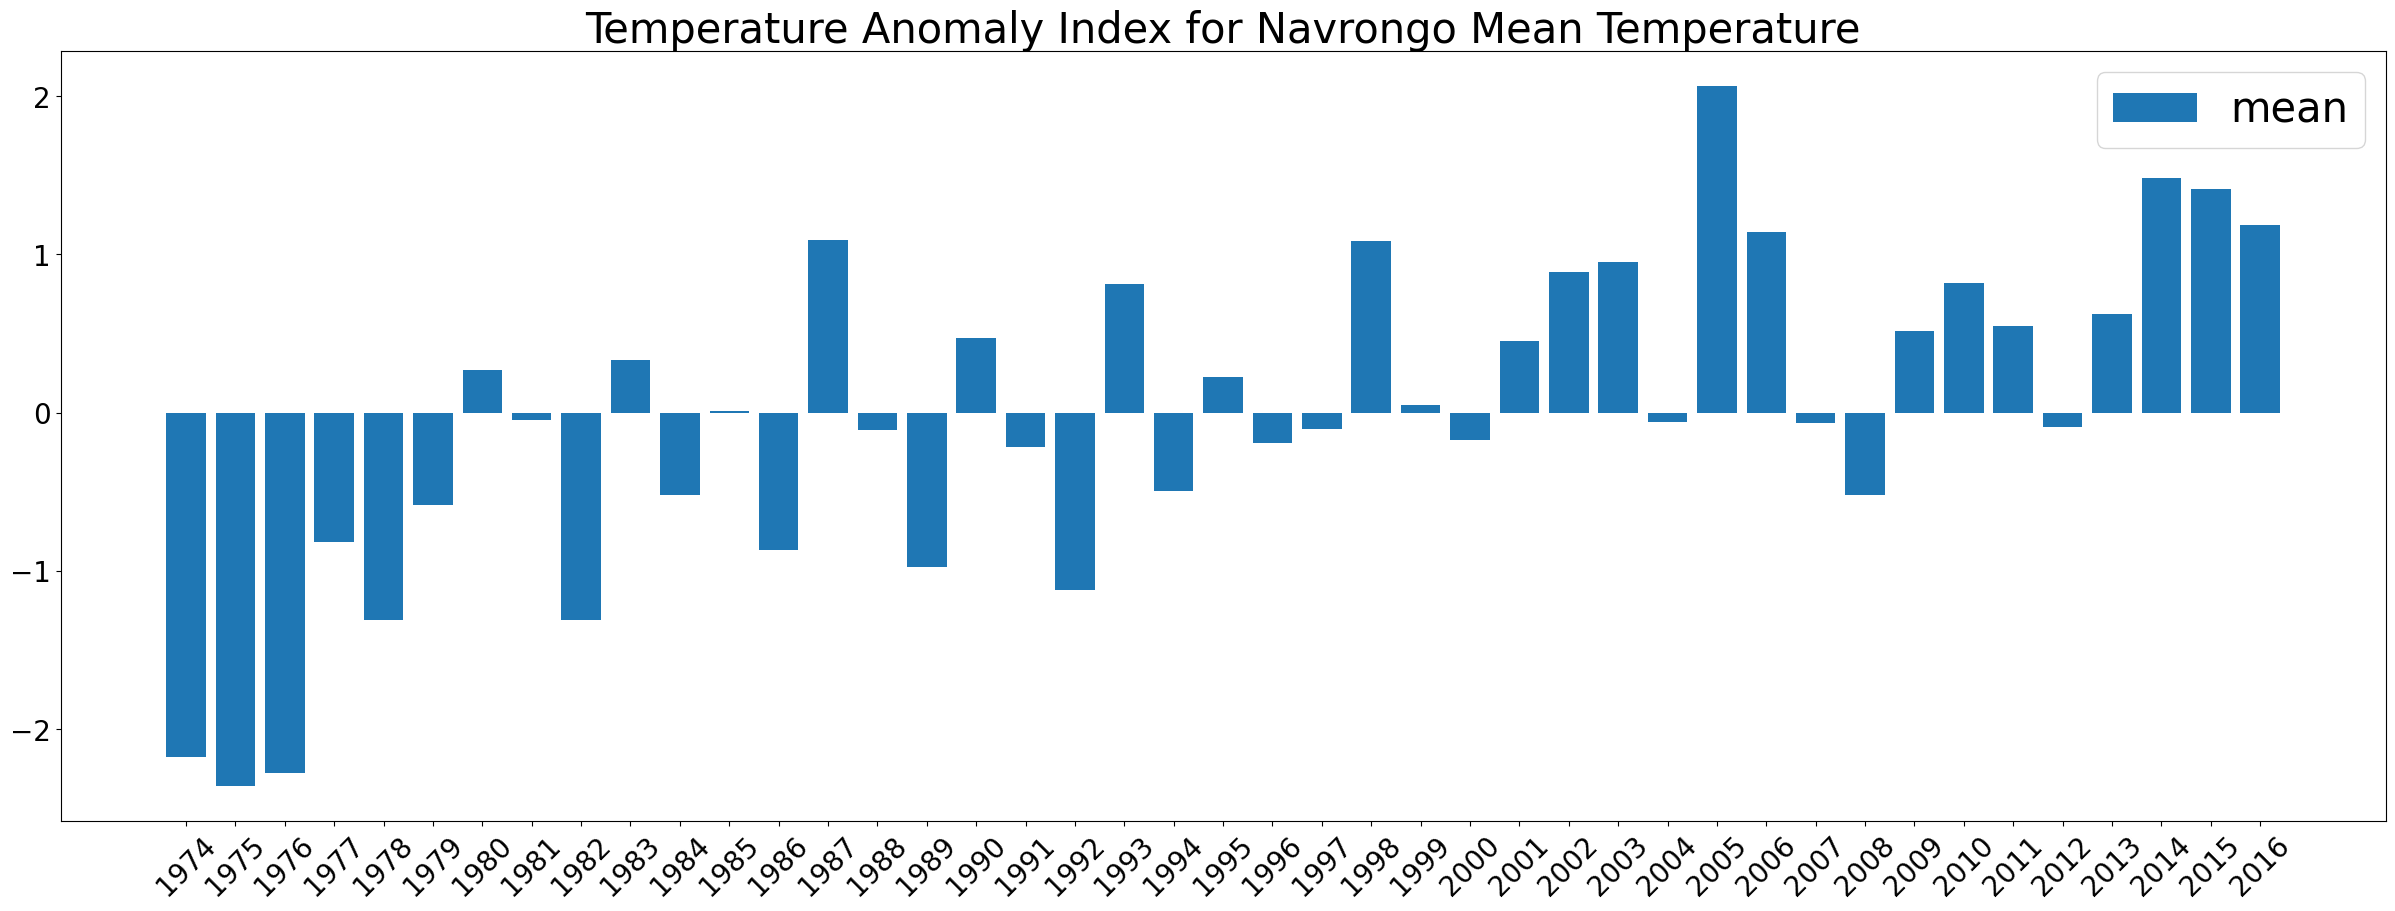

In [18]:
#plot temperature anomaly index as a bar chart for each dataset

plt.rcParams["figure.figsize"] = (30, 10)
plt.bar(df1_yearly.index, df1_temp_anomaly, label='mean')
plt.legend(fontsize=30)
plt.xticks(df1_yearly.index, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Temperature Anomaly Index for Navrongo Mean Temperature', fontsize=30)
plt.savefig('Navrongo-mean-temperature-anomaly.png')
plt.show()

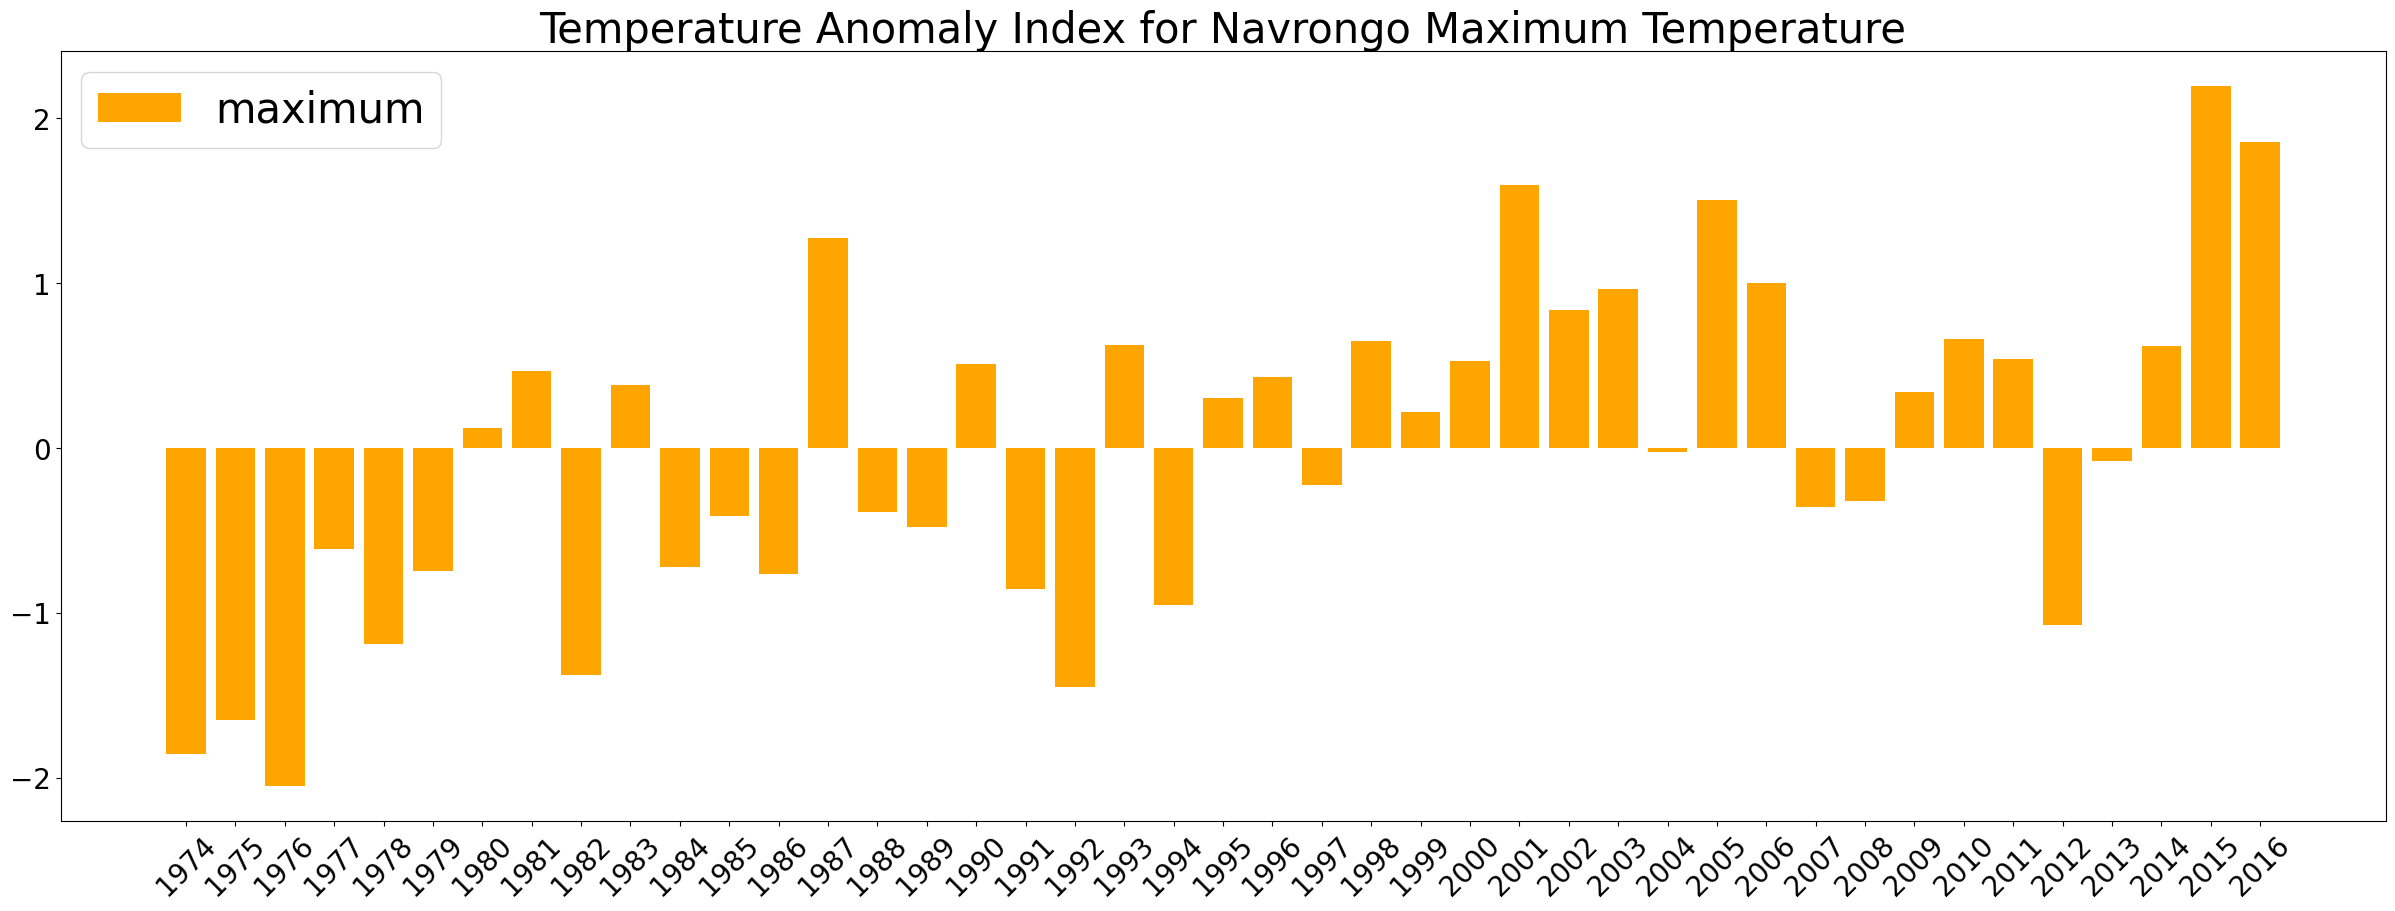

In [19]:
#plot temperature anomaly index as a bar chart for each dataset

plt.rcParams["figure.figsize"] = (30, 10)
plt.bar(df2_yearly.index, df2_temp_anomaly, label='maximum', color='orange')
plt.legend(fontsize=30, loc='upper left')
plt.xticks(df2_yearly.index, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Temperature Anomaly Index for Navrongo Maximum Temperature', fontsize=30)
plt.savefig('Navrongo-max-temperature-anomaly.png')
plt.show()


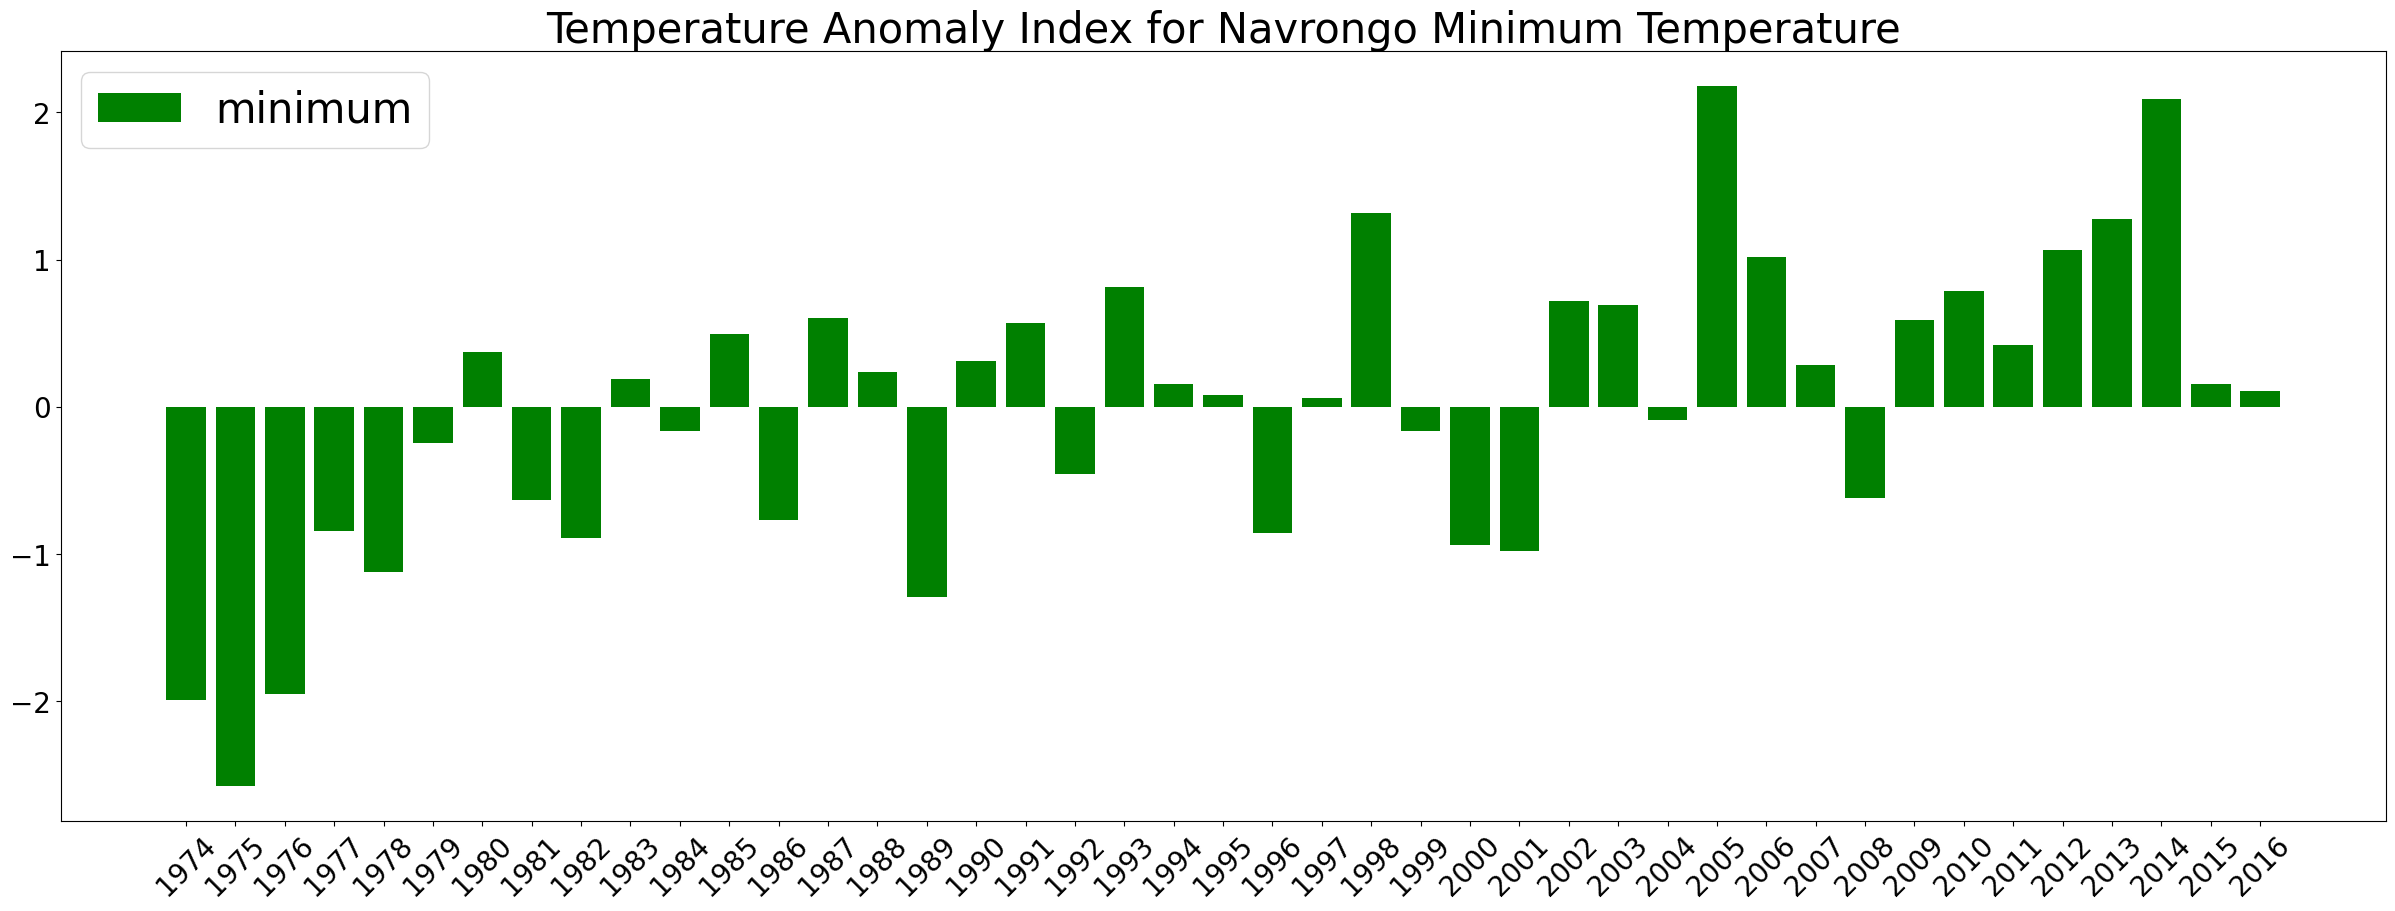

In [20]:
#plot temperature anomaly index as a bar chart for each dataset

plt.rcParams["figure.figsize"] = (30, 10)
plt.bar(df3_yearly.index, df3_temp_anomaly, label='minimum', color='green')
plt.legend(fontsize=30)
plt.xticks(df3_yearly.index, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Temperature Anomaly Index for Navrongo Minimum Temperature', fontsize=30)
plt.savefig('Navrongo-min-temperature-anomaly.png')
plt.show()


In [21]:
#find trend of yearly average temperature using pymannkendall
import pymannkendall as mk

df1_yearly_trend = mk.original_test(df1_yearly['temperature']) #mean
df2_yearly_trend = mk.original_test(df2_yearly['temperature']) #max
df3_yearly_trend = mk.original_test(df3_yearly['temperature']) #min

print(df1_yearly_trend, df2_yearly_trend, df3_yearly_trend)

Mann_Kendall_Test(trend='increasing', h=True, p=2.021120944828425e-06, z=4.751300911917835, Tau=0.5038759689922481, s=455.0, var_s=9130.333333333334, slope=0.020526315789473903, intercept=28.568125450612833) Mann_Kendall_Test(trend='increasing', h=True, p=3.733600081412547e-05, z=4.123375681267901, Tau=0.4374307862679956, s=395.0, var_s=9130.333333333334, slope=0.023105022831050093, intercept=34.7328273074332) Mann_Kendall_Test(trend='increasing', h=True, p=0.00012252429139447685, z=3.841019677126128, Tau=0.40753045404208194, s=368.0, var_s=9129.333333333334, slope=0.018472395184723964, intercept=22.546600249066003)


In [22]:
mean_trend = df1_yearly_trend.trend
max_trend = df2_yearly_trend.trend
min_trend = df3_yearly_trend.trend

print(mean_trend, max_trend, min_trend)

increasing increasing increasing
